 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
whale_path = Path("Resources/whale_returns.csv")

In [5]:
# Reading whale returns
df_whale = pd.read_csv(whale_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
df_whale = df_whale.dropna().copy()
df_whale.isnull().sum()
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
alg_path = Path("Resources/algo_returns.csv")
df_alg = pd.read_csv(alg_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_alg.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
df_alg.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
df_alg = df_alg.dropna()
df_alg.isnull().sum()
df_alg.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
SP60_path = Path("Resources/sp_tsx_history.csv")
df_sp60 = pd.read_csv(SP60_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_sp60.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
df_sp60.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
df_sp60["Close"] = df_sp60["Close"].str.replace("$", "")
df_sp60["Close"] = df_sp60["Close"].str.replace(",", "").astype(float)
df_sp60.head()



/Users/annazhao/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Calculate Daily Returns
dailyreturns_sp60 = df_sp60.pct_change()
dailyreturns_sp60.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
dailyreturns_sp60 = dailyreturns_sp60.dropna()
dailyreturns_sp60.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
dailyreturns_sp60 = dailyreturns_sp60.rename(columns = {"Close":"S&P TSX60"})
dailyreturns_sp60.head()

,S&P TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([df_whale,df_alg,dailyreturns_sp60], axis = "columns", join = "inner")
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

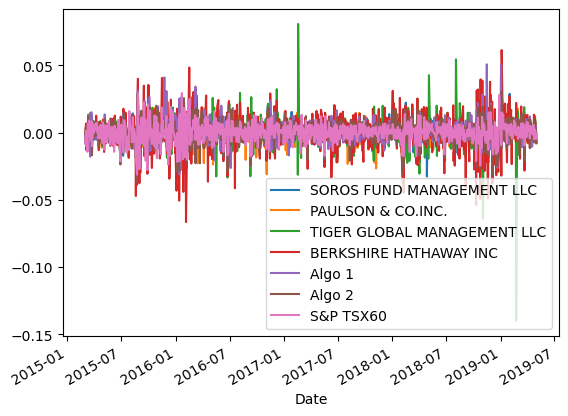

In [18]:
# Plot daily returns of all portfolios
df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

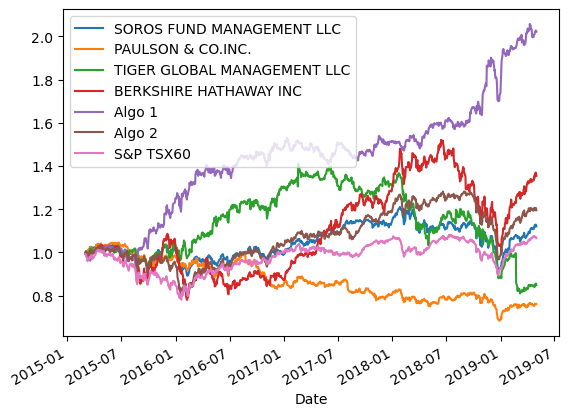

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

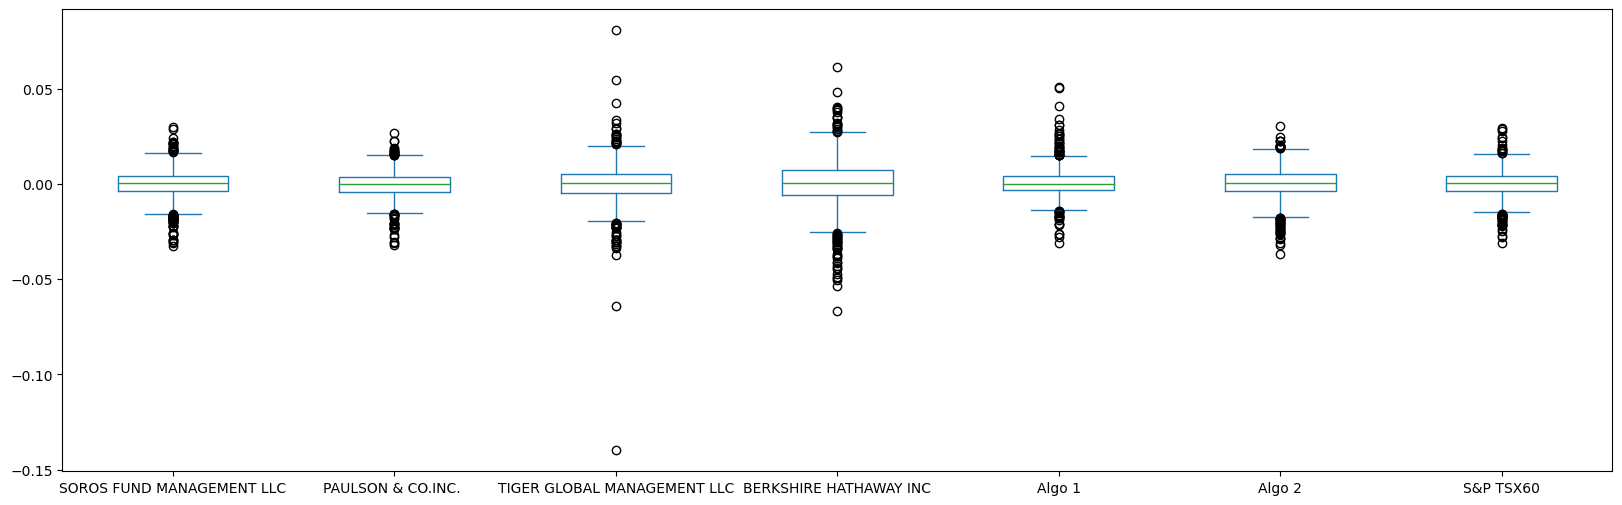

In [20]:
# Box plot to visually show risk
df.plot.box(figsize=(20, 6))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
df_std = df.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
std_tsx60 = df_std["S&P TSX60"]
# Determine which portfolios are riskier than the S&P TSX 60
risky_df = df_std[df_std > std_tsx60]
print(risky_df)


SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
import numpy as np
annulised_std = df_std * np.sqrt(252)
annulised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX60                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

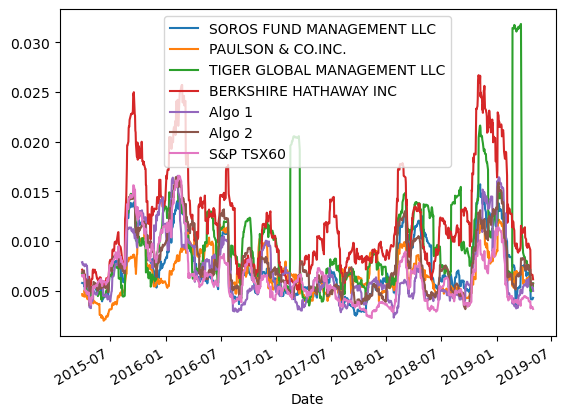

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_21 = df.rolling(window = 21).std()
# Plot the rolling standard deviation
std_21.plot()

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


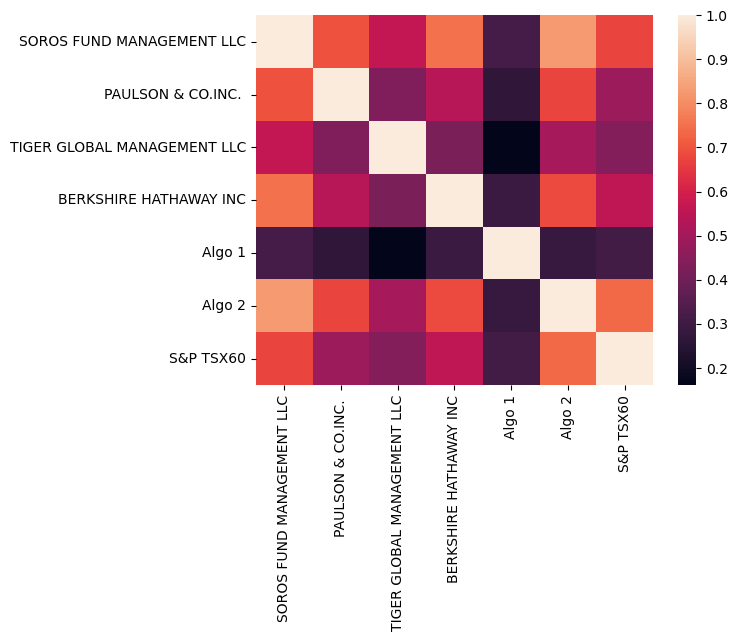

In [25]:
# Calculate the correlation
correlation = df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation)

correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC vs S&P 60 TSX'}, xlabel='Date'>

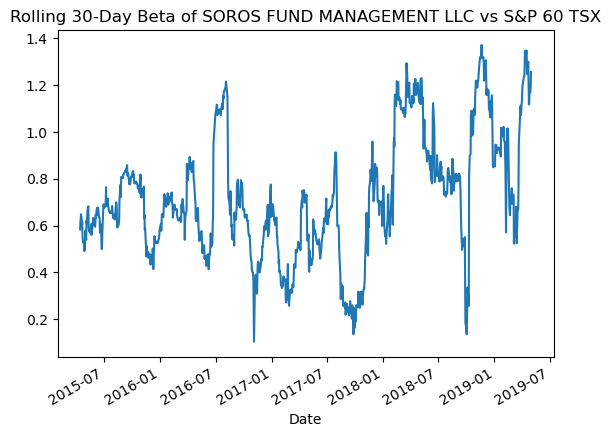

In [26]:
# Calculate covariance of a single portfolio
cov_soro = df["SOROS FUND MANAGEMENT LLC"].rolling(window = 30).cov(df["S&P TSX60"])

# Calculate variance of S&P TSX
TSX_var = df["S&P TSX60"].rolling(window = 30).var()
# Computing beta
beta_soro = cov_soro / TSX_var

# Plot beta trend
beta_soro.plot(title="Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC vs S&P 60 TSX")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

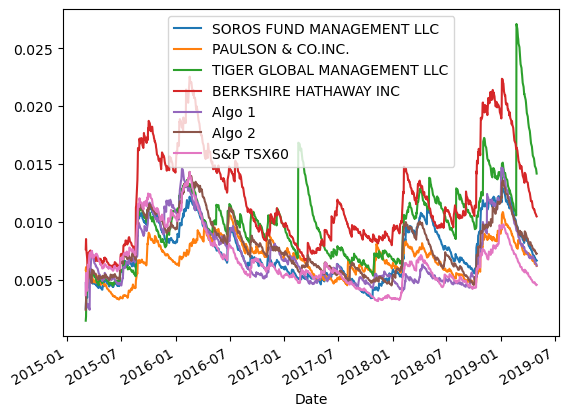

In [27]:
# Use `ewm` to calculate the rolling window
ewm_std = df.ewm(halflife=21, adjust=False).std()
ewm_std.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = ((df.mean()-df["S&P TSX60"].mean()) * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX60                      0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

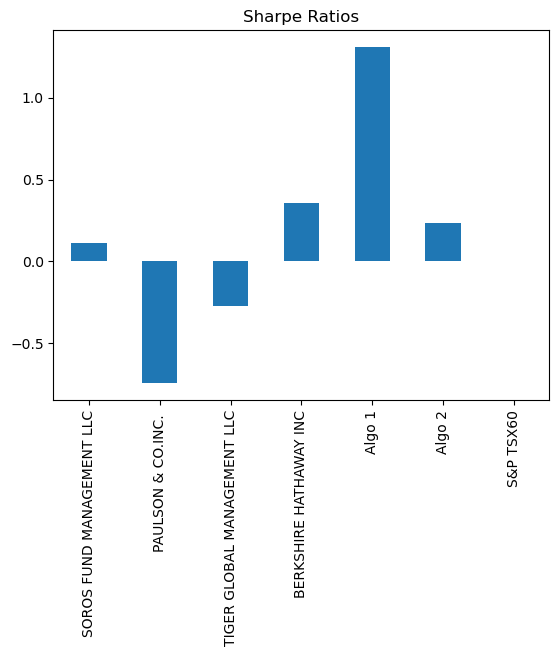

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo1 outperforms the market and the whales portfolios.
Algo2 outperforms the market but not the BERKSHIRE HATHAWAY INC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
shop_path = Path("Resources/shop_historical.csv")
df_shop = pd.read_csv(shop_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_shop = df_shop.drop(columns = "Symbol")
df_shop = df_shop.rename(columns = {"Close":"SHOP"})
df_shop.head()

In [344]:
# Reading data from 2nd stock
otex_path = Path("Resources/otex_historical.csv")
df_otex = pd.read_csv(otex_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_otex = df_otex.drop(columns = "Symbol")
df_otex = df_otex.rename(columns = {"Close":"OTEX"})
df_otex.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [345]:
# Reading data from 3rd stock
l_path = Path("Resources/l_historical.csv")
df_l = pd.read_csv(l_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_l = df_l.drop(columns = "Symbol")
df_l = df_l.rename(columns = {"Close":"l"})
df_l.head()

,l
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [346]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([df_shop,df_otex,df_l],axis = "columns", join = "inner")
combined_df.head()

,SHOP,OTEX,l
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [347]:
# Reset Date index


In [348]:
# Reorganize portfolio data by having a column per symbol


In [349]:
# Calculate daily returns
df2 = combined_df.pct_change()

# Drop NAs
df2 = df2.dropna()
# Display sample data
df2.head()

,SHOP,OTEX,l
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [350]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
df2["My Portfolio"] = df2.dot(weights)
df2 = df2.drop(columns = ["SHOP","OTEX","l"])
# Display sample data
df2.head()


,My Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [351]:
# Join your returns DataFrame to the original returns DataFrame
my_portfolio = pd.concat([df,df2],axis = "columns", join = "inner")
my_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [352]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
my_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX60                      0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [353]:
# Calculate the annualized `std`
std2 = my_portfolio.std()*np.sqrt(252)
std2.head()

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

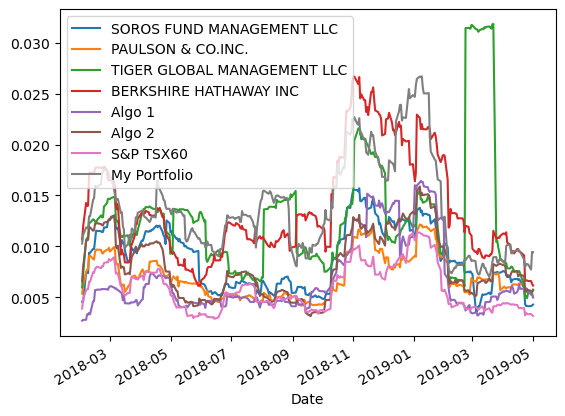

In [354]:
# Calculate rolling standard deviation
std21_2 = my_portfolio.rolling(window = 21).std()
# Plot rolling standard deviation
std21_2.plot()

### Calculate and plot the correlation

<Axes: >

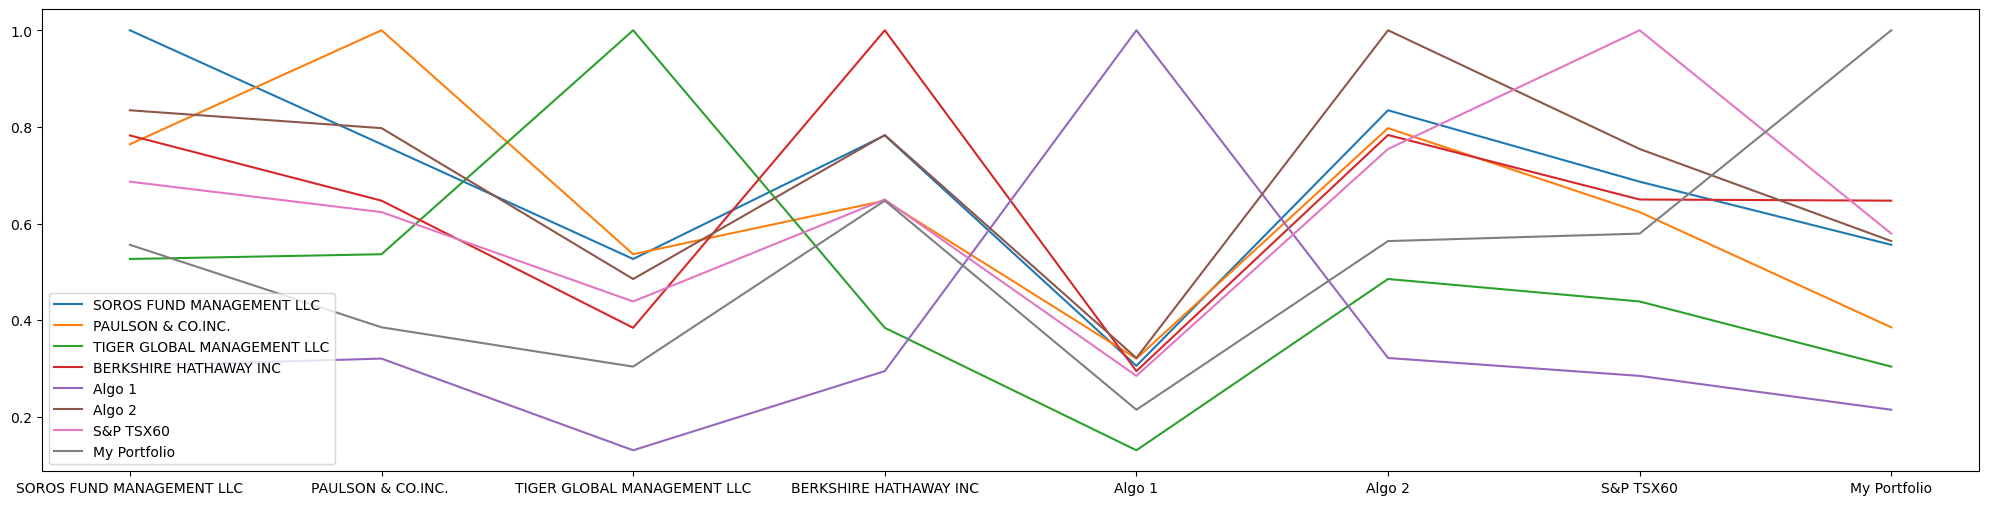

In [355]:
# Calculate and plot the correlation
my_portfolio.corr().plot(figsize = [25,6])


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of My Portfolio vs S&P 60 TSX'}, xlabel='Date'>

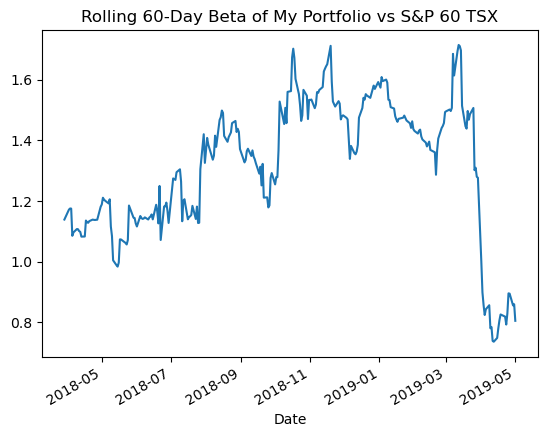

In [356]:
# Calculate and plot Beta
cov_my = my_portfolio["My Portfolio"].rolling(window = 60).cov(my_portfolio["S&P TSX60"])
var_tsx2 = my_portfolio["S&P TSX60"].rolling(window = 60).var()
beta_myportfolio = cov_my/var_tsx2
beta_myportfolio.plot(title="Rolling 60-Day Beta of My Portfolio vs S&P 60 TSX")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [357]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = ((my_portfolio.mean()-my_portfolio["S&P TSX60"].mean()) * 252) / (my_portfolio.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC     -0.111773
PAULSON & CO.INC.             -0.426319
TIGER GLOBAL MANAGEMENT LLC   -1.407236
BERKSHIRE HATHAWAY INC         0.180806
Algo 1                         1.872846
Algo 2                        -0.003555
S&P TSX60                      0.000000
My Portfolio                   1.549237
dtype: float64

<Axes: title={'center': 'Sharpe Ratios with my portfolio'}>

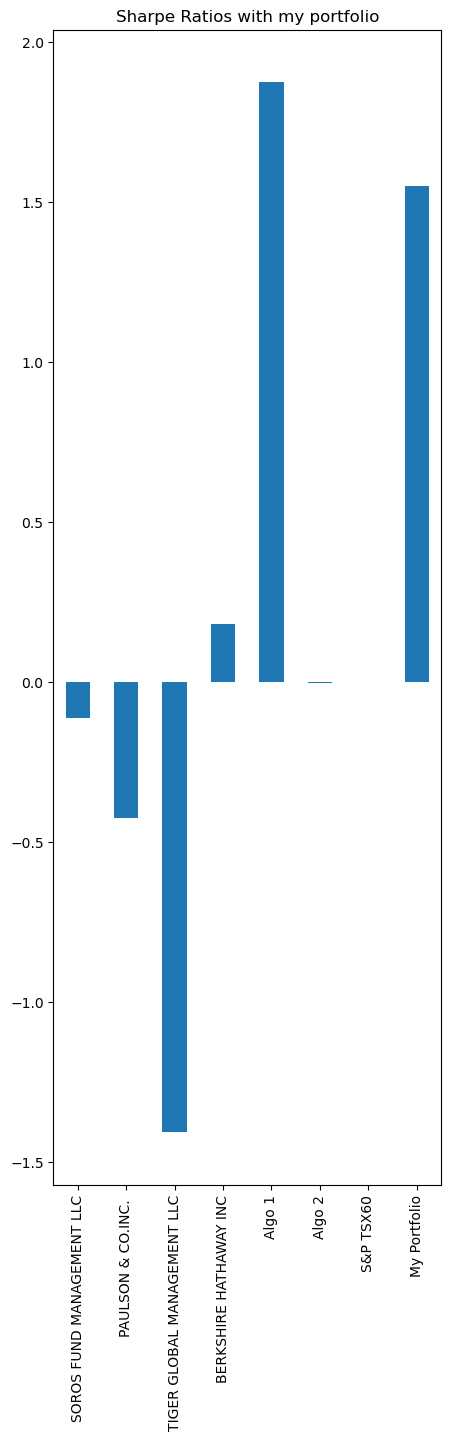

In [364]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind = "bar",title="Sharpe Ratios with my portfolio",figsize = [5,15])

### How does your portfolio do?

Write your answer here!

My portfolio outperforms the market and the whales, but not as good as Algo1.